In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('waterQuality1.csv')
print(df.shape)
df.head()


(7999, 21)


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
# There is no null value in df
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [5]:
# There is no meaningless value in df for min and max values
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [7]:
# Now there is no text values in the df
df = df[(df['ammonia'] != '#NUM!') & (df['is_safe'] != '#NUM!')]
df[['ammonia', 'is_safe']] = df[['ammonia', 'is_safe']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

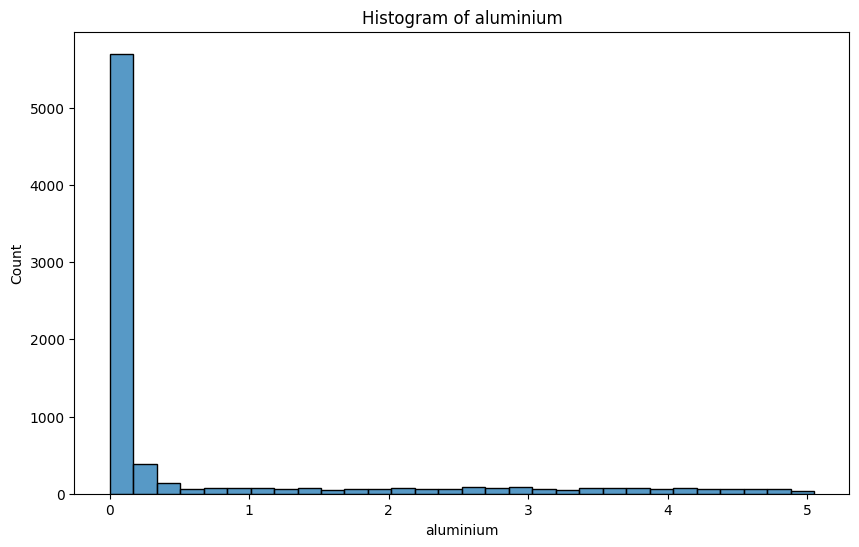

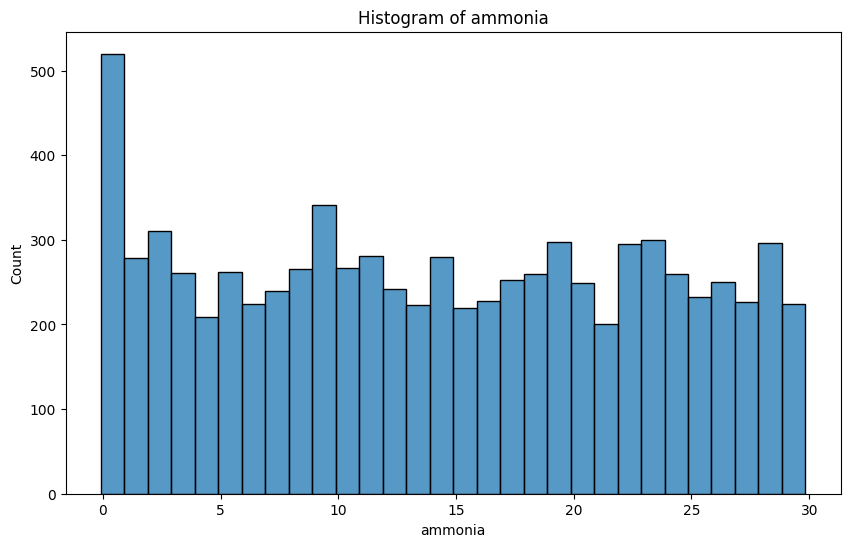

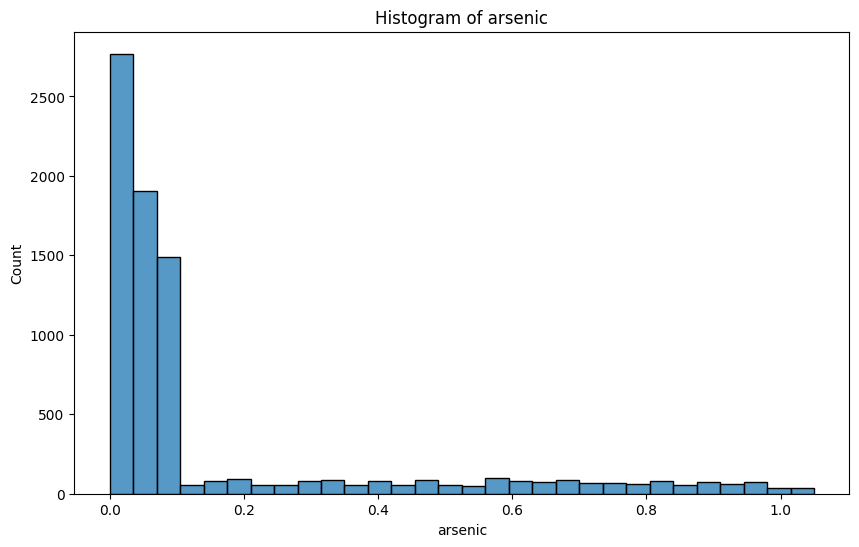

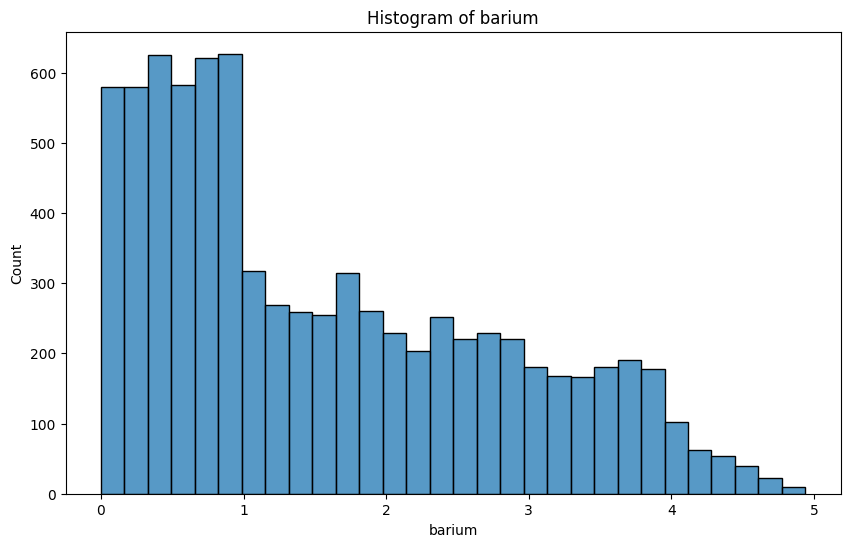

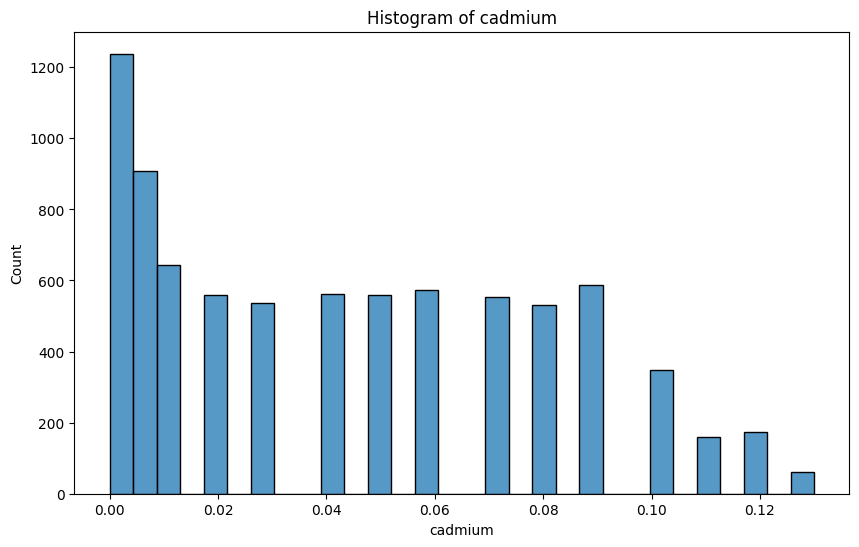

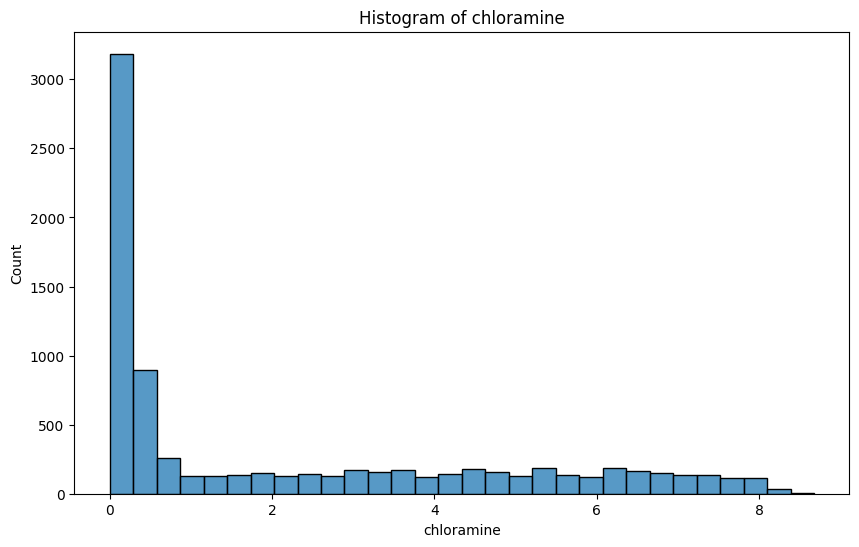

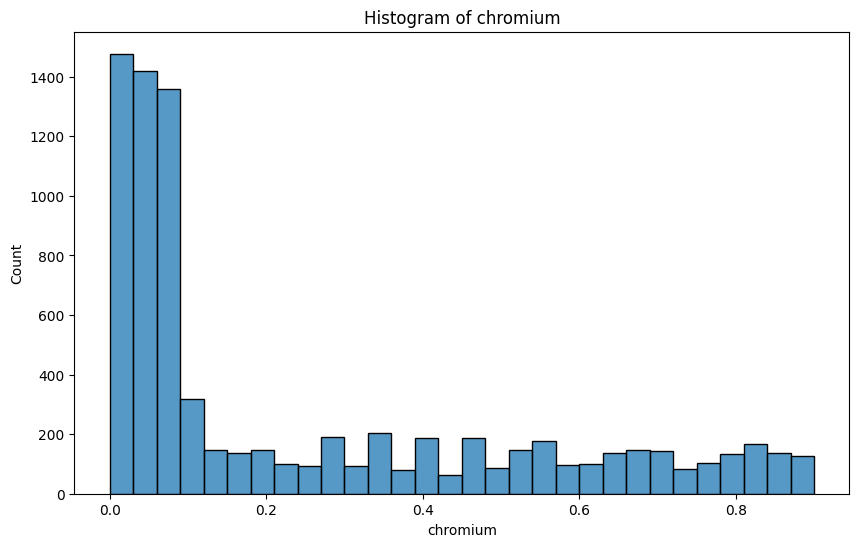

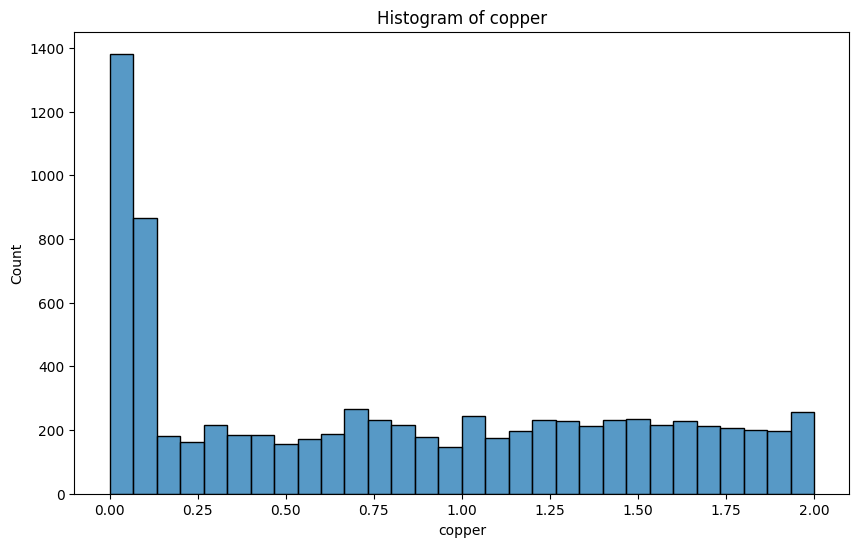

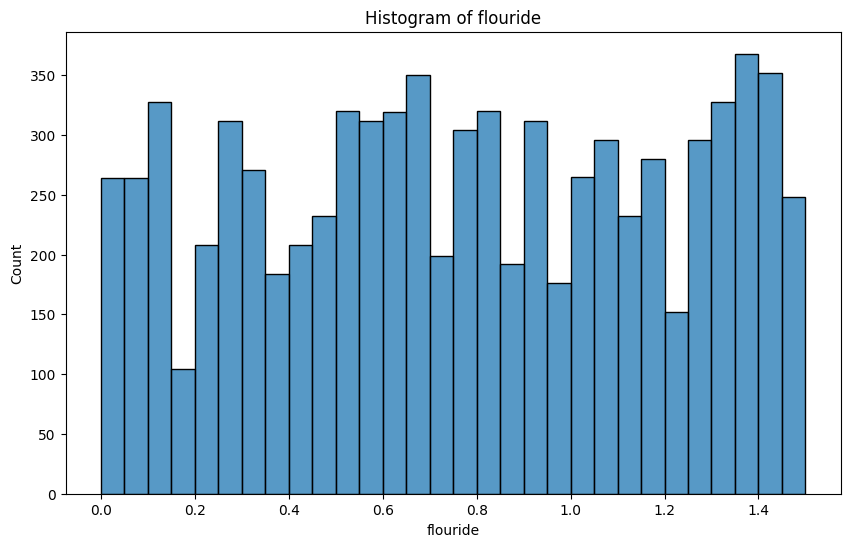

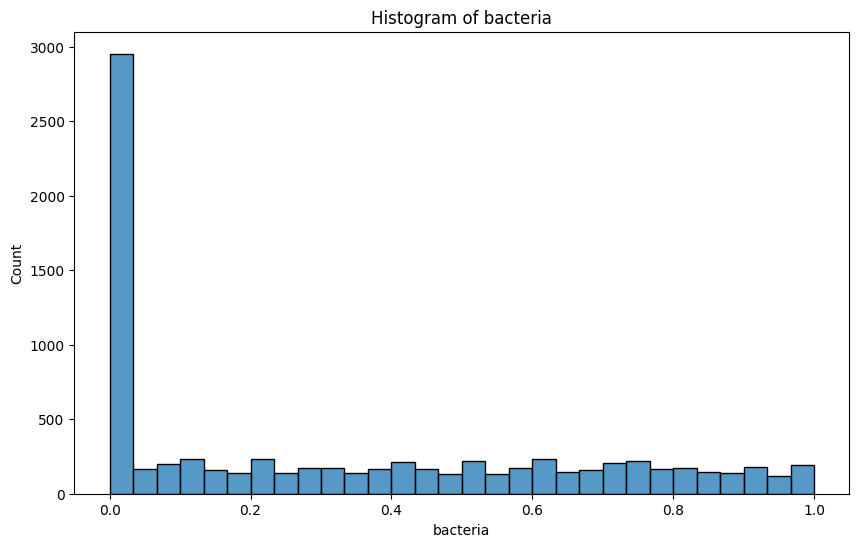

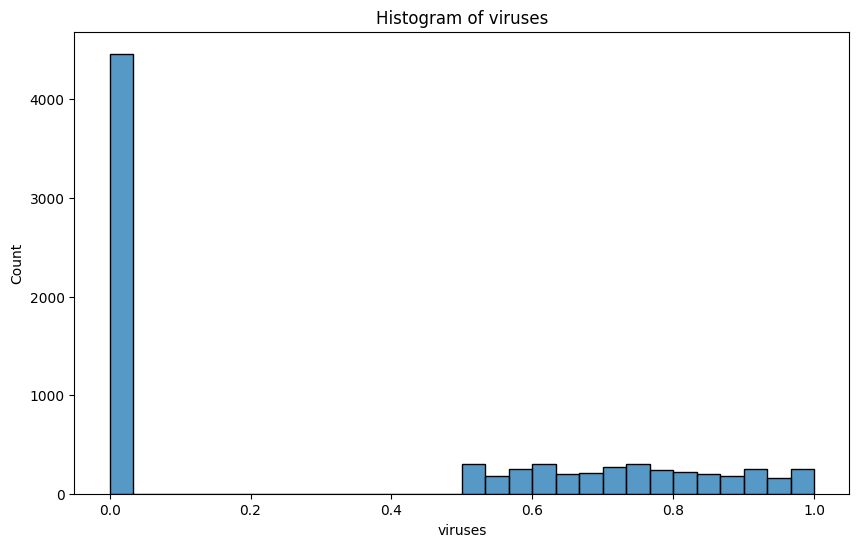

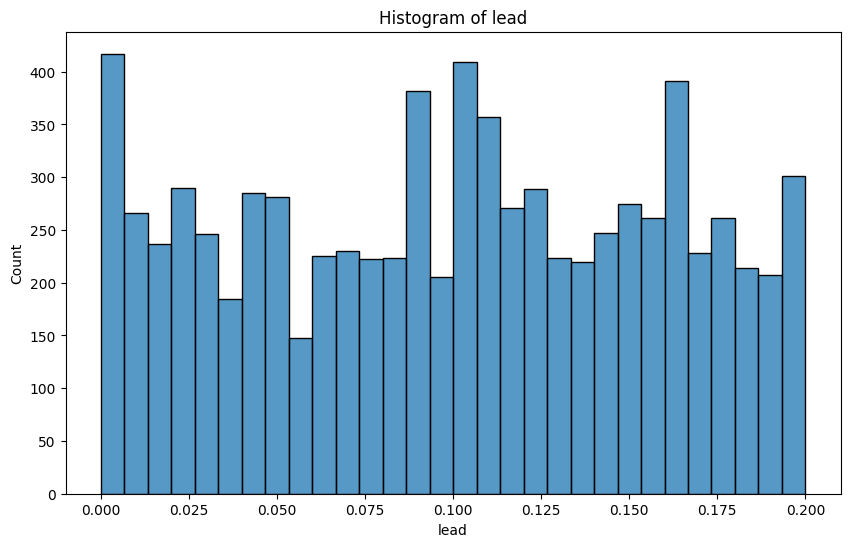

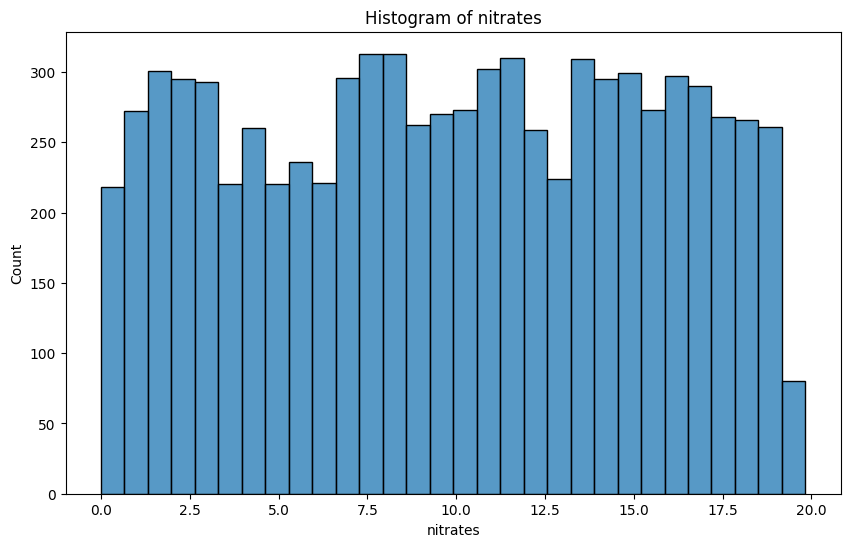

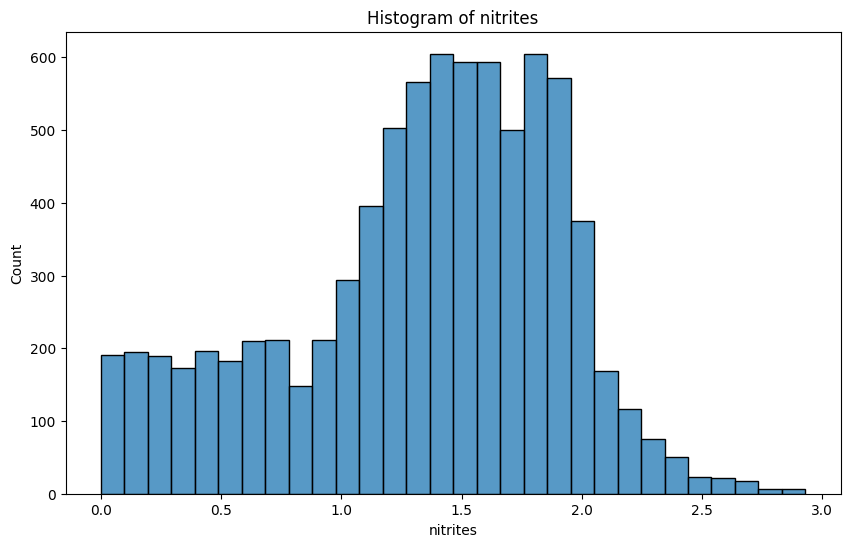

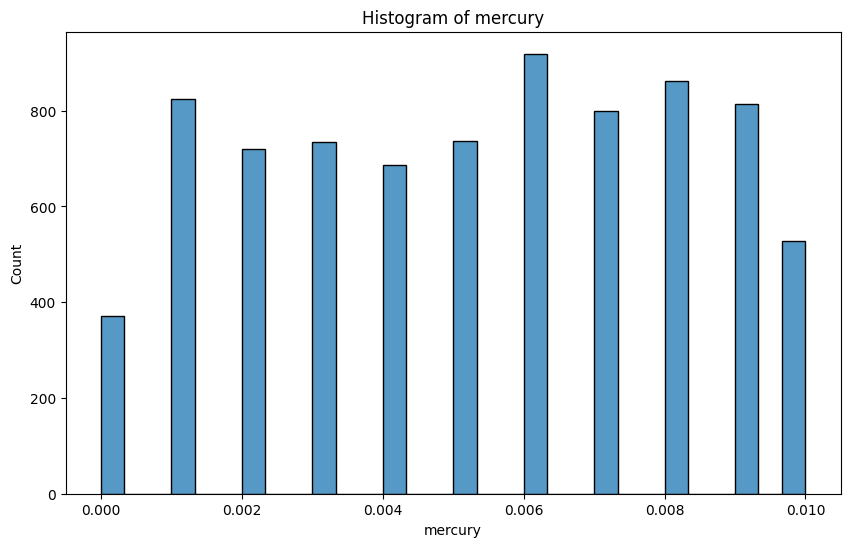

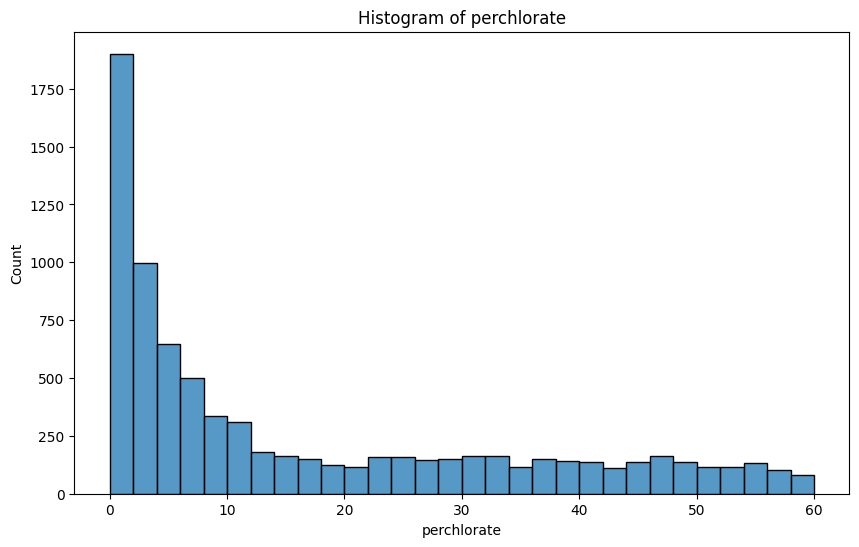

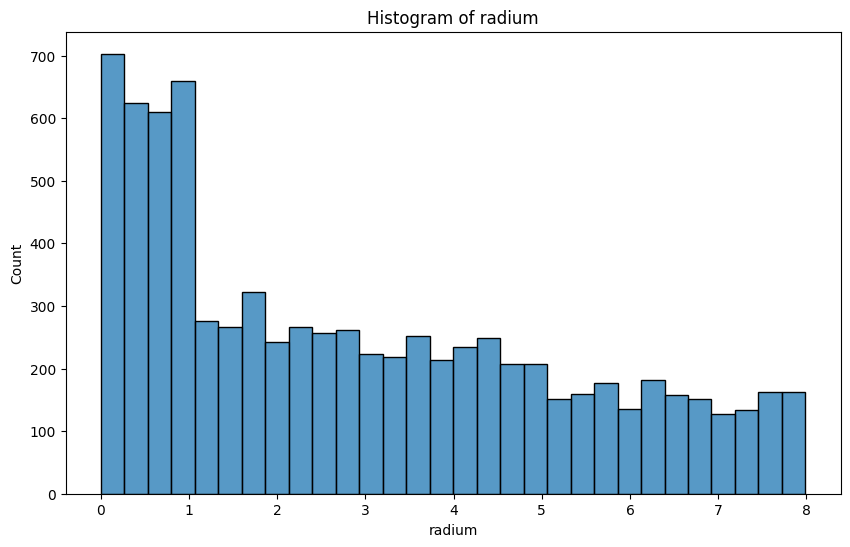

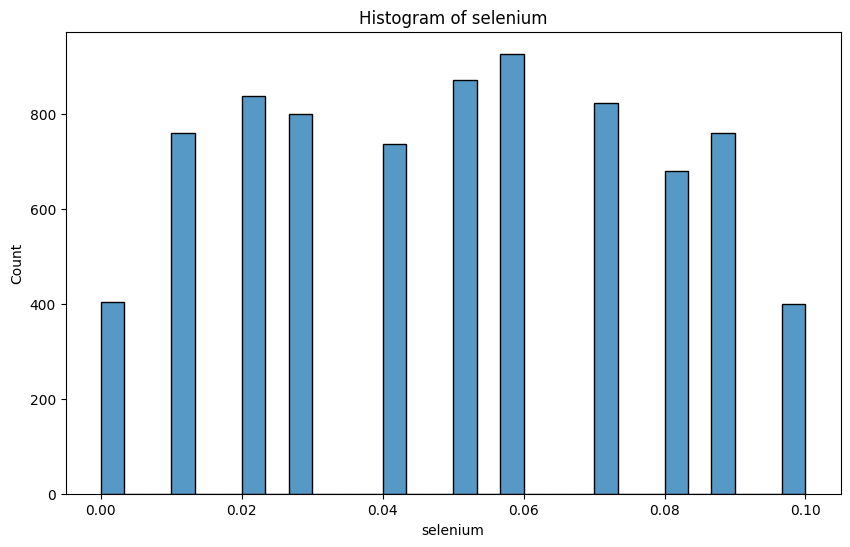

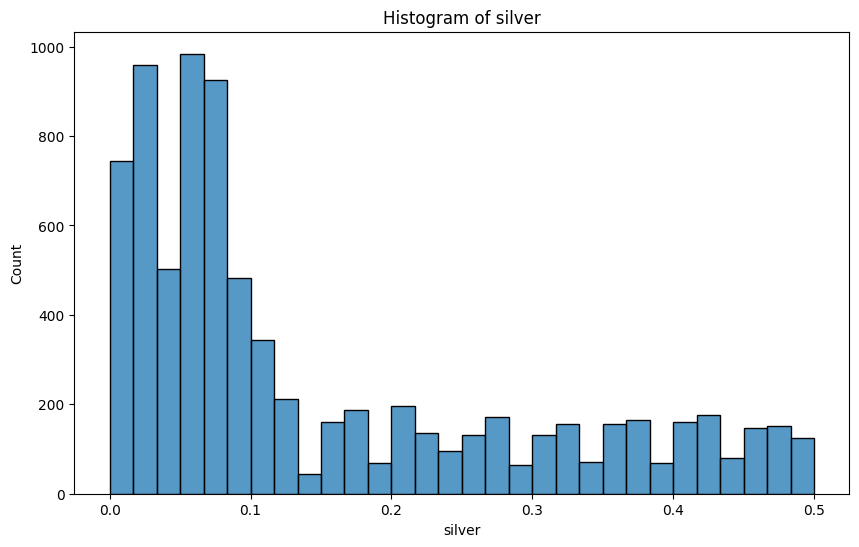

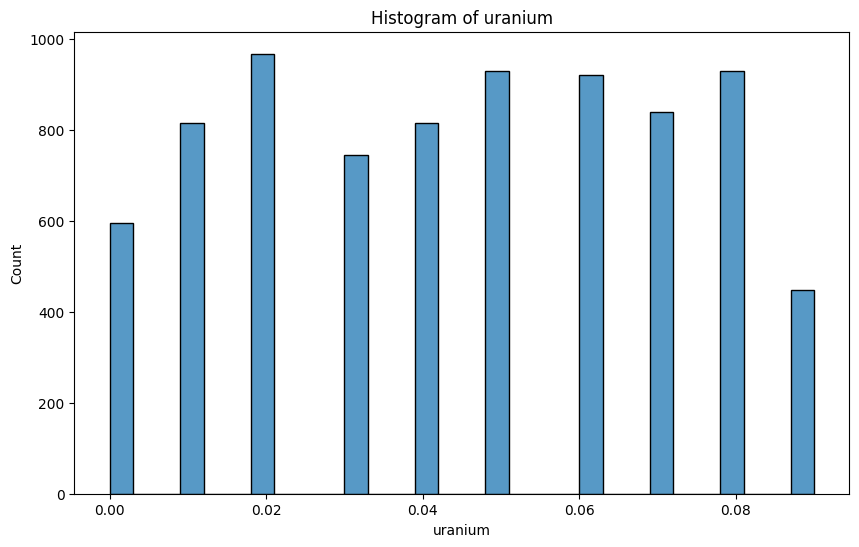

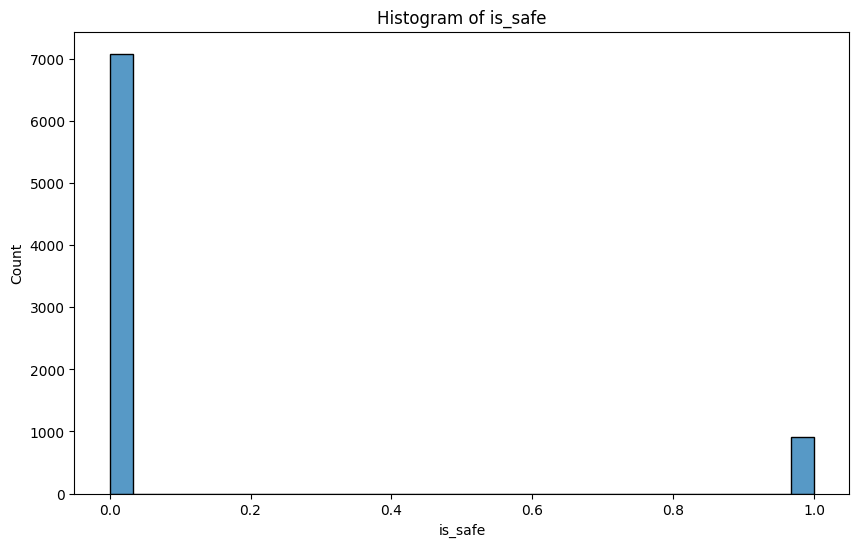

In [8]:
for i in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=df[i], bins=30)
    plt.title(f'Histogram of {i}')
    plt.show()

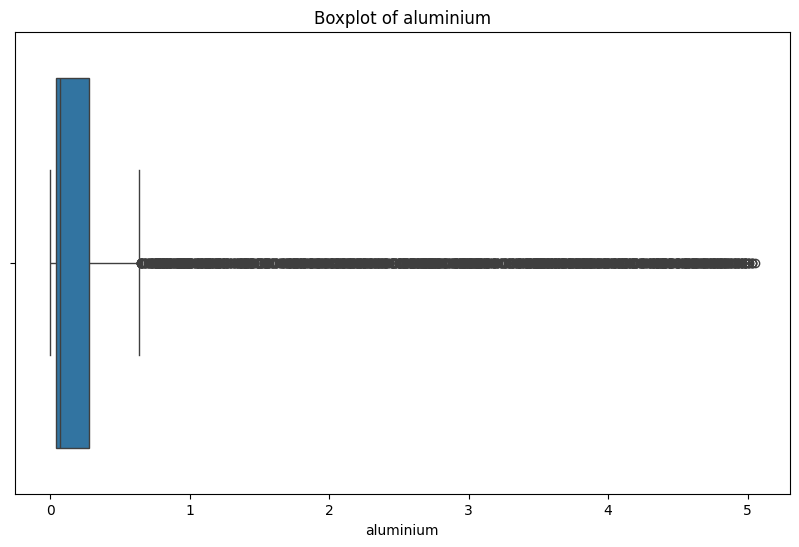

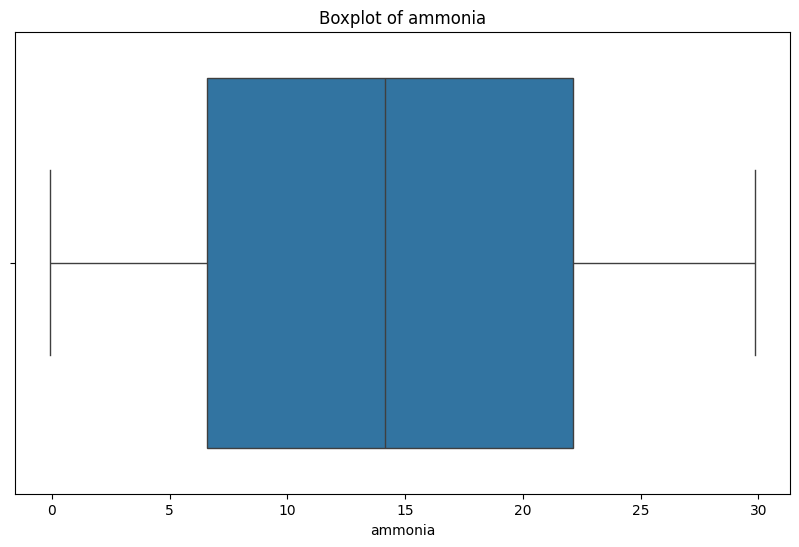

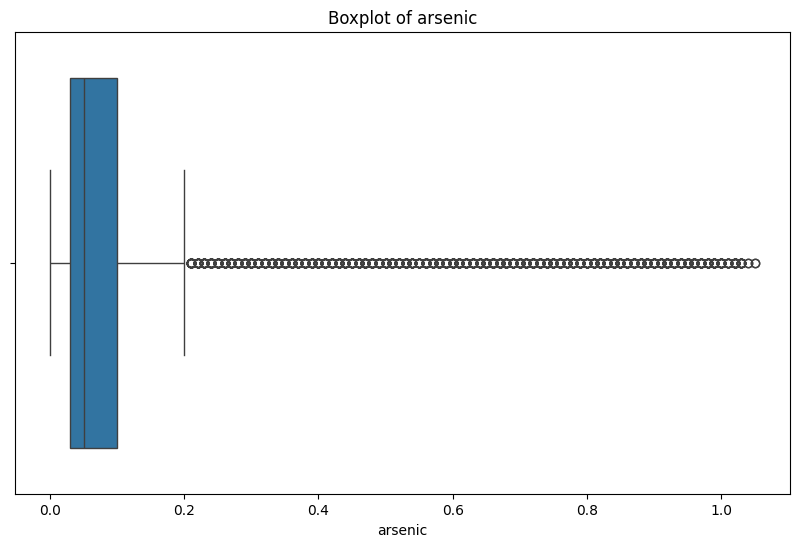

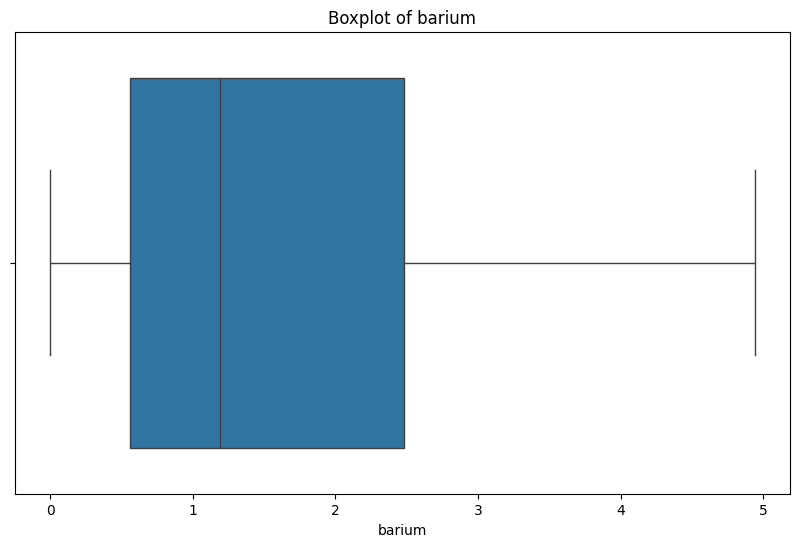

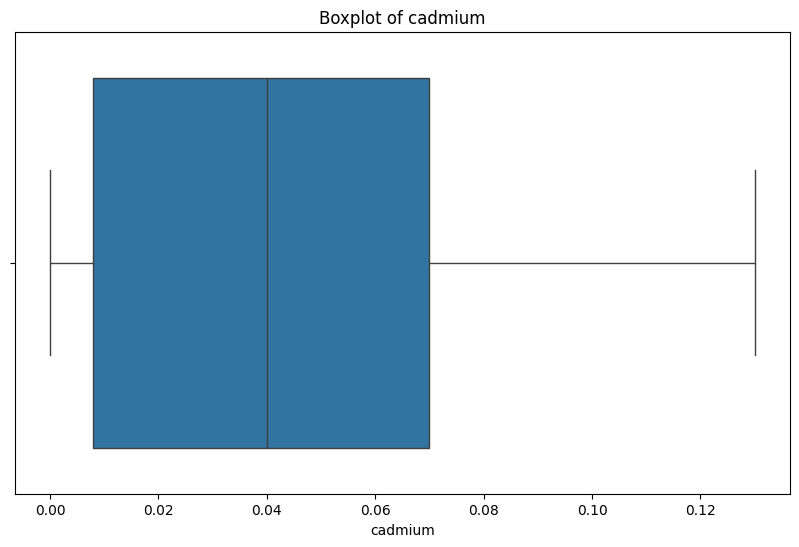

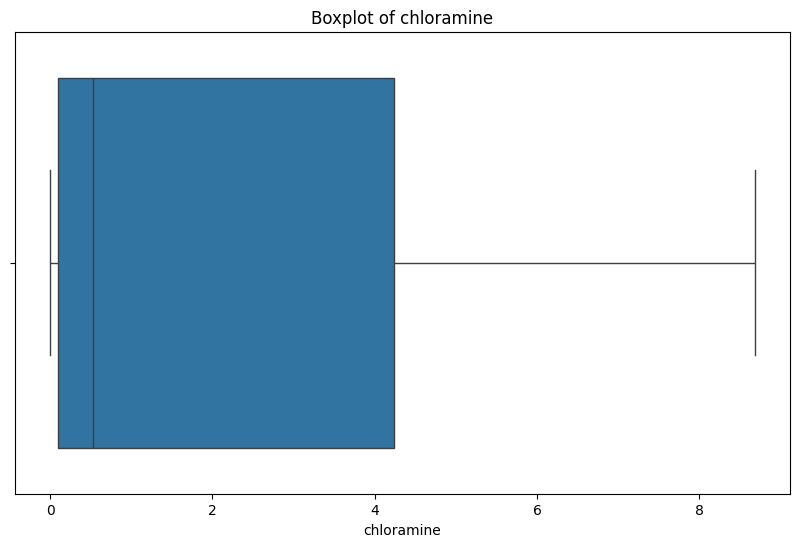

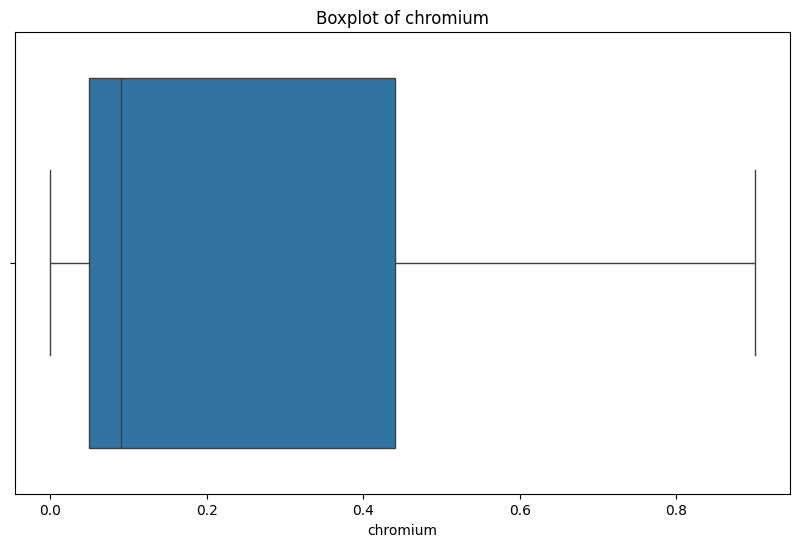

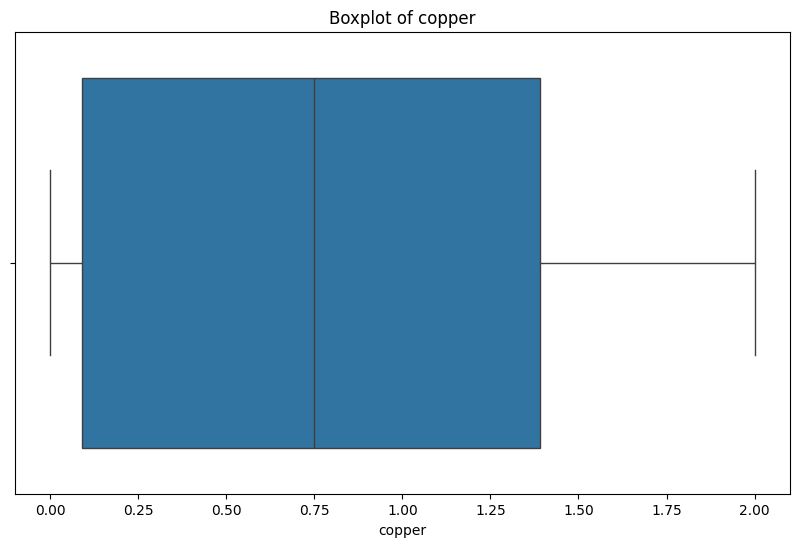

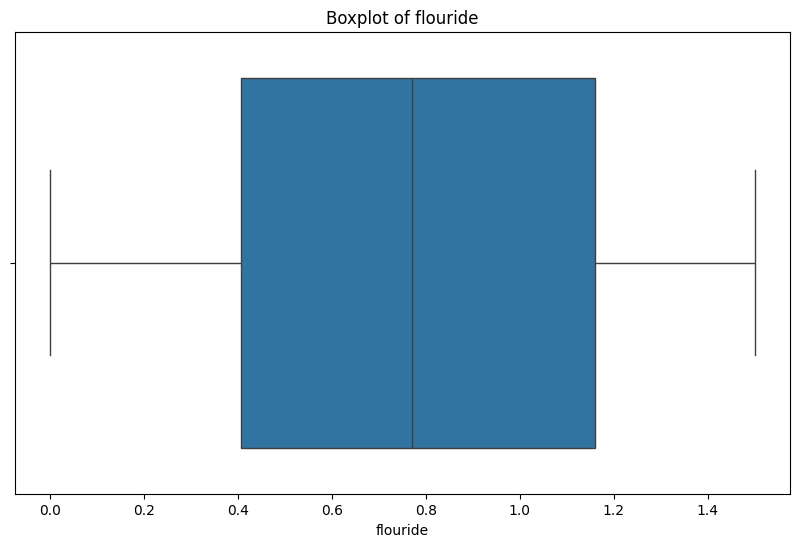

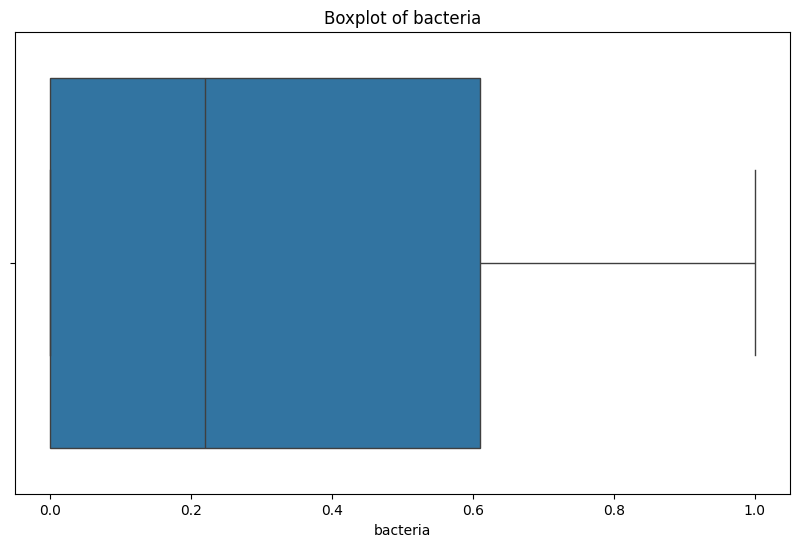

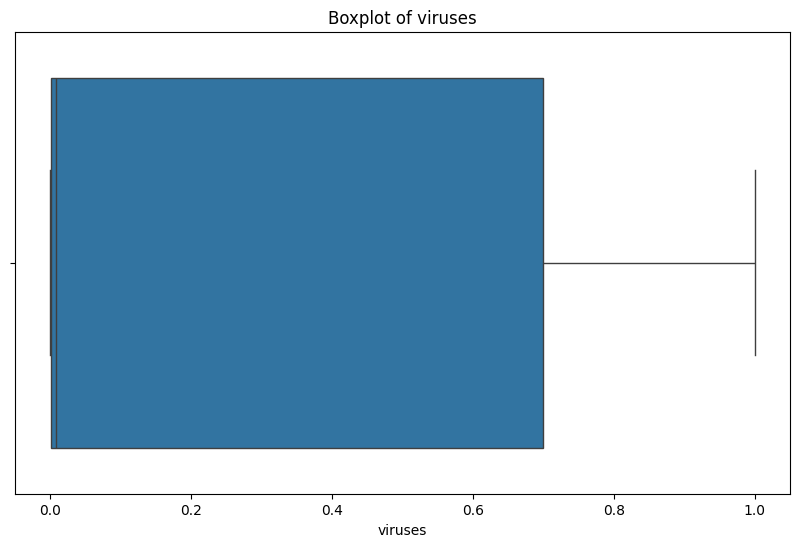

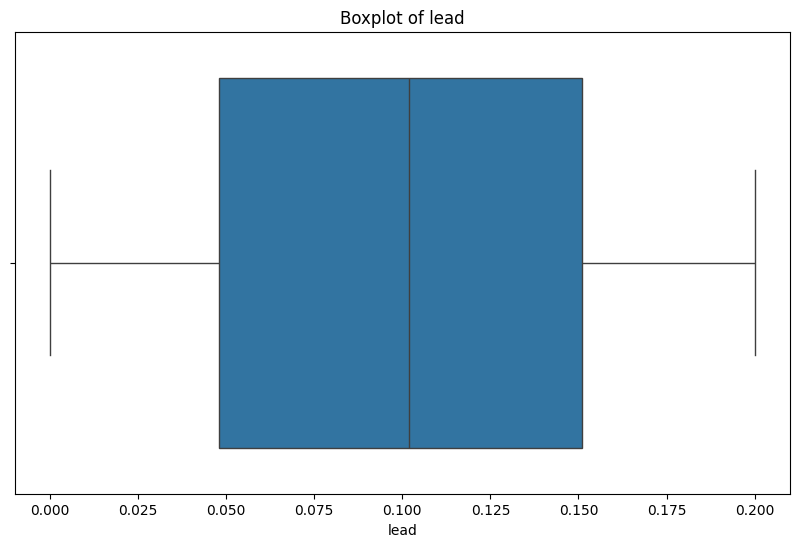

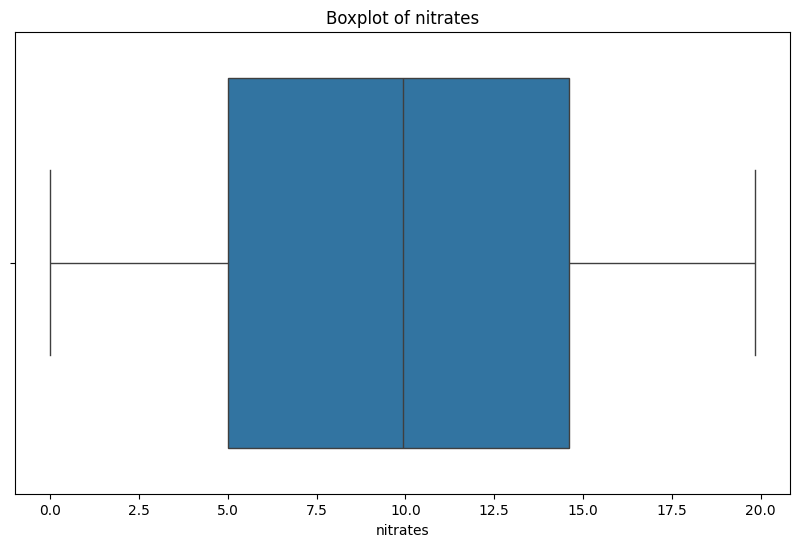

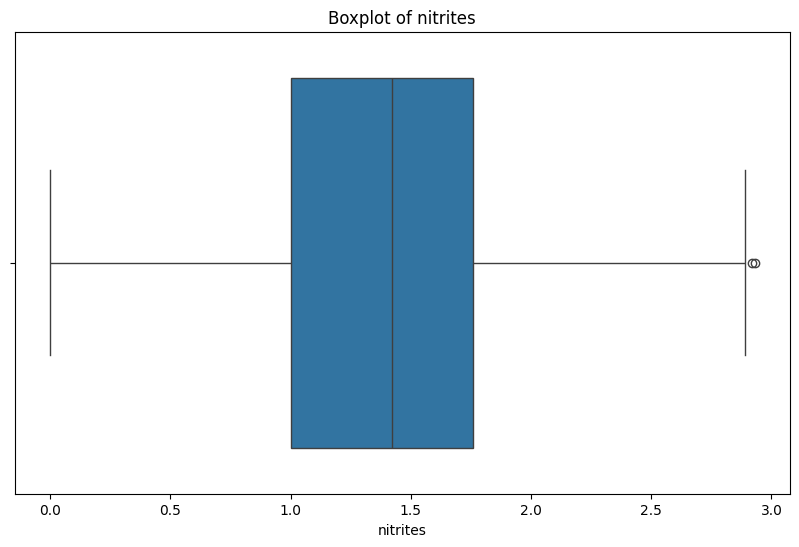

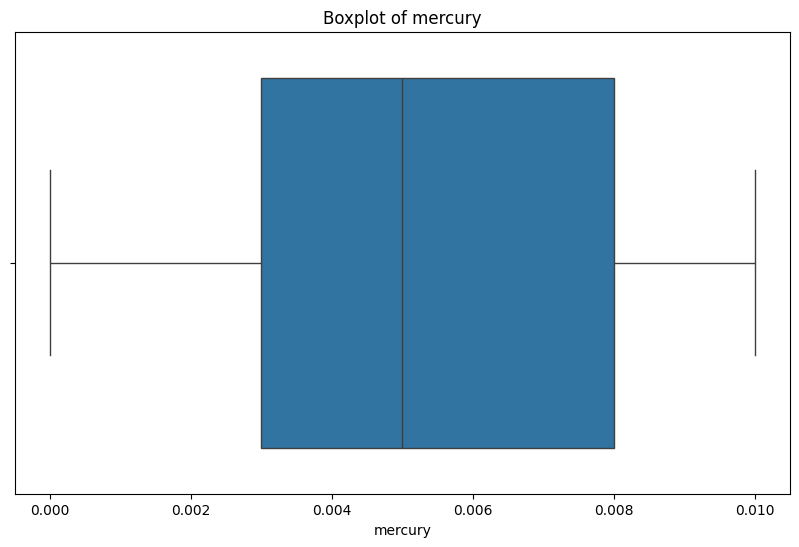

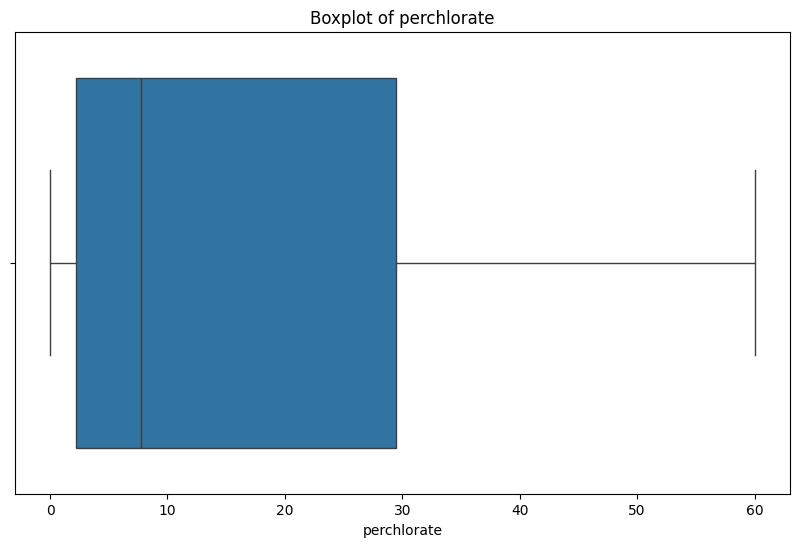

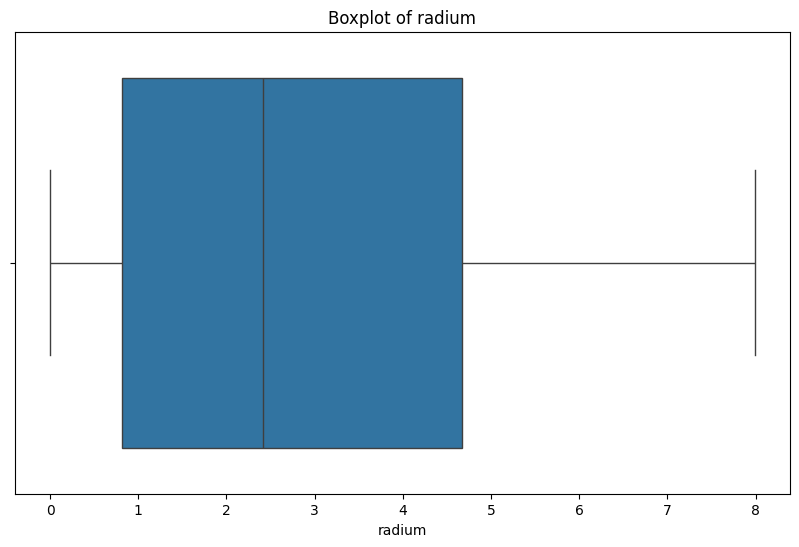

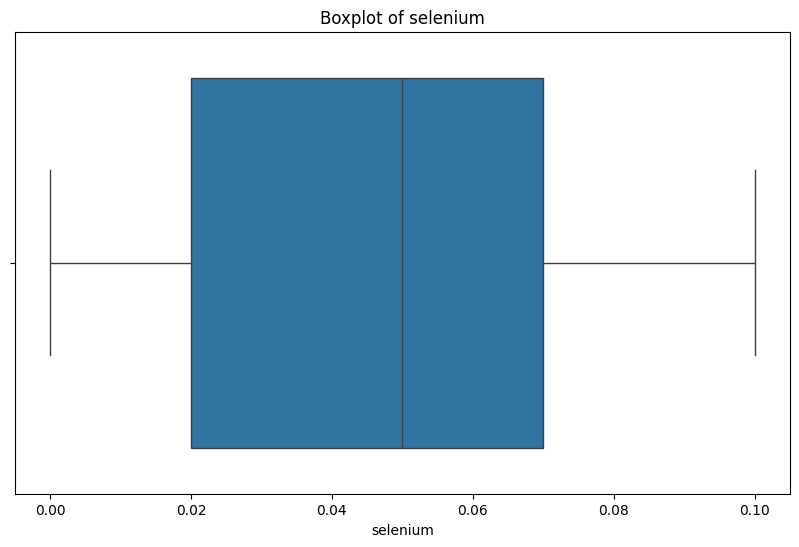

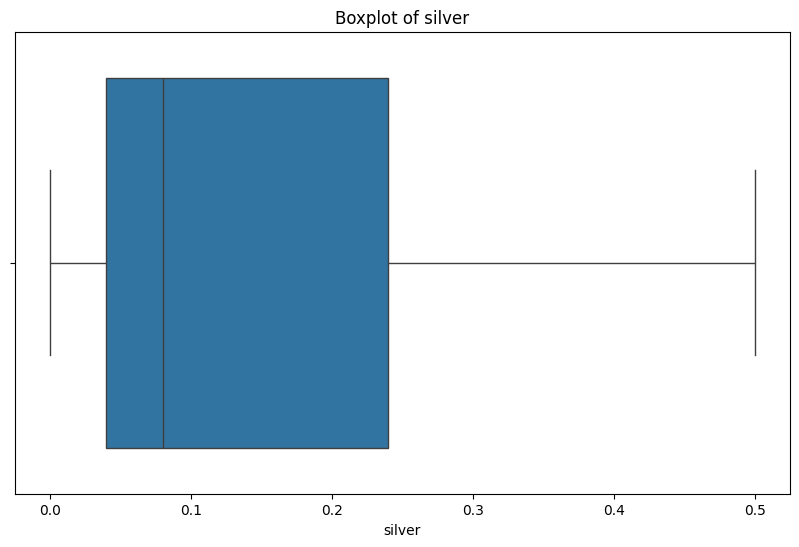

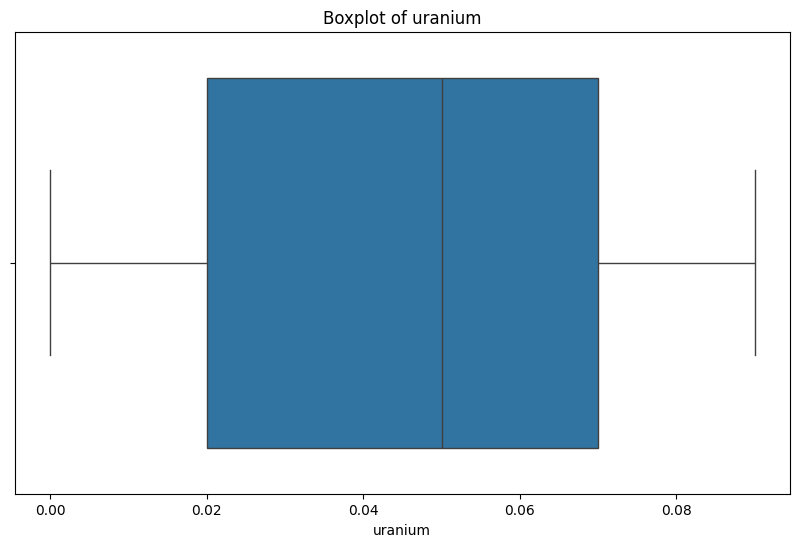

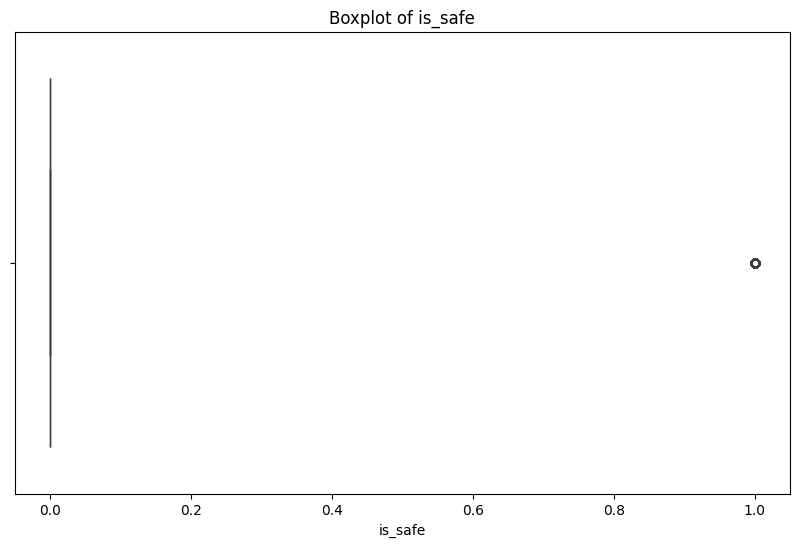

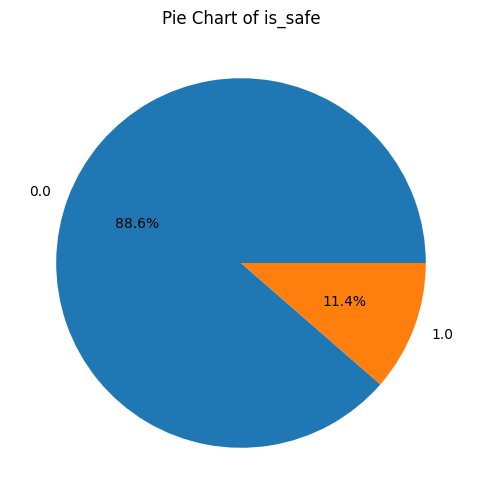

In [9]:
for i in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()
plt.figure(figsize=(10, 6))
plt.pie(df['is_safe'].value_counts(), labels = df['is_safe'].value_counts().index, autopct='%1.1f%%')
plt.title(f'Pie Chart of is_safe')
plt.show()    

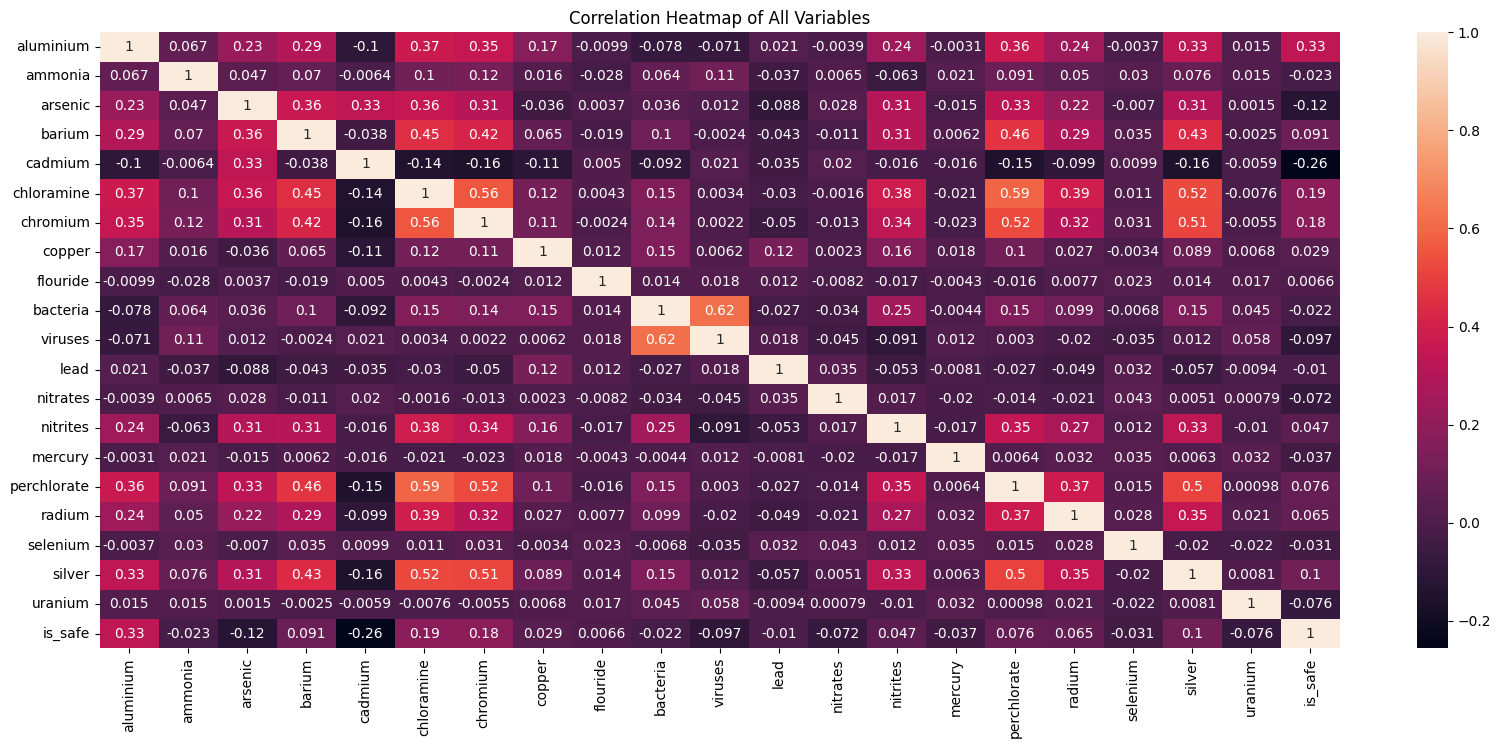

In [10]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap of All Variables')
plt.show()

In [11]:
# Drop unrelated columns 
df = df.drop(columns=['lead', 'flouride', 'copper'])
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,bacteria,viruses,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.20,0.000,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.65,0.650,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.05,0.003,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,0.71,0.710,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.13,0.001,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


In [12]:
# find first and last quantile
q1_alum = df['aluminium'].quantile(0.25)
q3_alum = df['aluminium'].quantile(0.75)
iqr_aluminium = q3_alum - q1_alum

q1_arsenic = df['arsenic'].quantile(0.25)
q3_arsenic = df['arsenic'].quantile(0.75)
iqr_arsenic = q3_arsenic - q1_arsenic

# find upper und lower limits 
upper_aluminium = q3_alum + (1.5 * iqr_aluminium)
lower_aluminium = q1_alum - (1.5 * iqr_aluminium)

upper_arsenic = q3_arsenic + (1.5 * iqr_arsenic)
lower_arsenic = q3_arsenic - (1.5 * iqr_arsenic)

# Outliers
outliers_alum = df[(df['aluminium'] < lower_aluminium) | (df['aluminium'] > upper_aluminium)]
print('For Aluminium' ,outliers_alum['is_safe'].value_counts())

outliers_arsenic = df[(df['arsenic'] < lower_arsenic) | (df['arsenic'] > upper_arsenic)]
outliers_arsenic['is_safe'].value_counts()

For Aluminium is_safe
0.0    1140
1.0     591
Name: count, dtype: int64


is_safe
0.0    1556
1.0      78
Name: count, dtype: int64

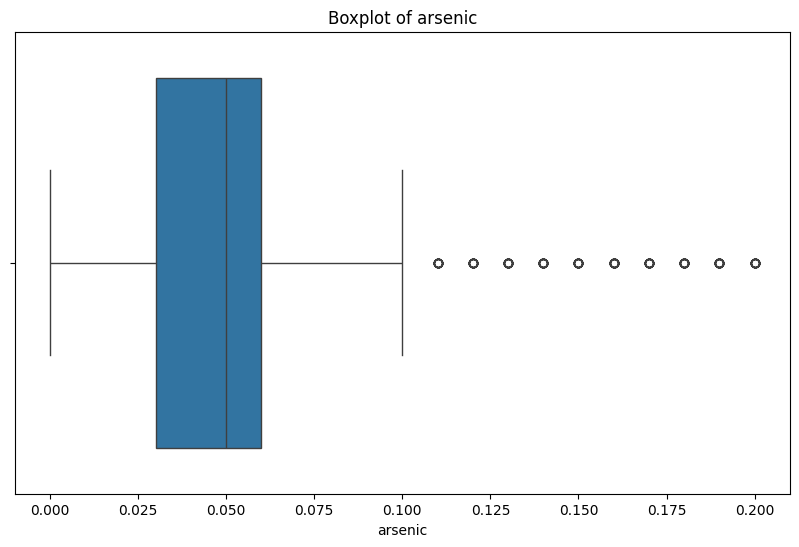

In [13]:
# Median Imputation
df.loc[(df['arsenic'] < lower_arsenic) | (df['arsenic'] > upper_arsenic), 'arsenic'] = df['arsenic'].median()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['arsenic'])
plt.title(f'Boxplot of arsenic')
plt.show() # yorum yaz

In [14]:
df[['ammonia', 'is_safe']] = df[['ammonia', 'is_safe']].astype(str)
df['ammonia'] = df['ammonia'].str.strip()
df['is_safe'] = df['is_safe'].str.strip()
df = df[(df['ammonia'] != '#NUM!') & (df['is_safe'] != '#NUM!')]
df[['ammonia', 'is_safe']] = df[['ammonia', 'is_safe']].astype(float)
print((df['is_safe']=='#NUM!').sum())
print((df['ammonia']=='#NUM!').sum())
df.info()


0
0
<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   bacteria     7996 non-null   float64
 8   viruses      7996 non-null   float64
 9   nitrates     7996 non-null   float64
 10  nitrites     7996 non-null   float64
 11  mercury      7996 non-null   float64
 12  perchlorate  7996 non-null   float64
 13  radium       7996 non-null   float64
 14  selenium     7996 non-null   float64
 15  silver       7996 non-null   float64
 16  uranium      7996 non-null   float64
 17  is_safe      7996 non-null   float64
dtypes: float64(18)
memory usage: 1.2 MB


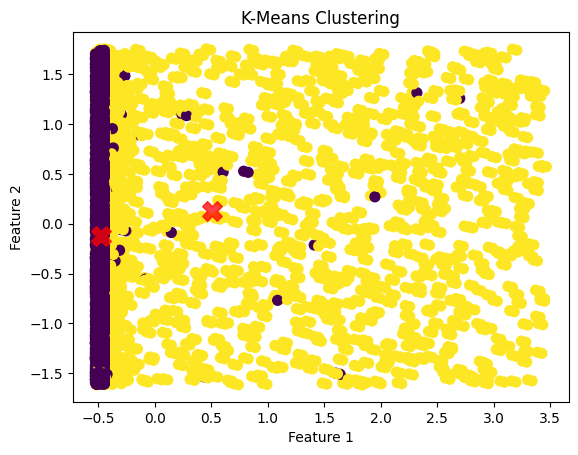

In [15]:
# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
kmeans = KMeans(n_clusters=2)

# Step 5: Fit the model to the data
X = df.drop(columns='is_safe').values  # Convert dataframe to numpy array
X = scaler.fit_transform(X)
kmeans.fit(X)

# Step 6: Predict the cluster for each data point
y_kmeans = kmeans.predict(X)

# Step 7: Visualize the clusters

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='is_safe')
y = df['is_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

In [18]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train , y_train)


y_pred = rf.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score


print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.9524802000833681
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2091
         1.0       0.93      0.69      0.79       308

    accuracy                           0.95      2399
   macro avg       0.94      0.84      0.88      2399
weighted avg       0.95      0.95      0.95      2399



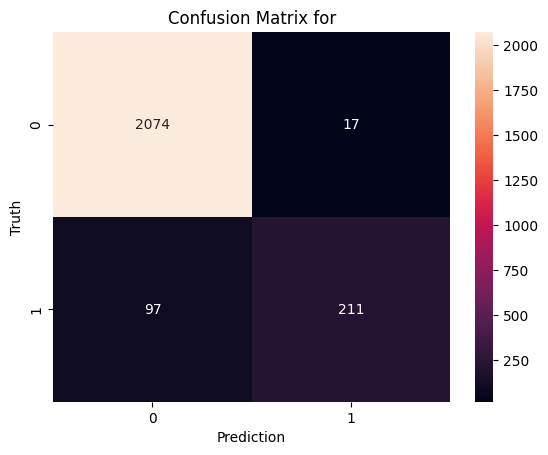

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

conf_dec_tree = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_dec_tree, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix for')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [20]:

from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=42)


dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))


Accuracy: 0.9453939141308879
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2091
         1.0       0.78      0.79      0.79       308

    accuracy                           0.95      2399
   macro avg       0.88      0.88      0.88      2399
weighted avg       0.95      0.95      0.95      2399



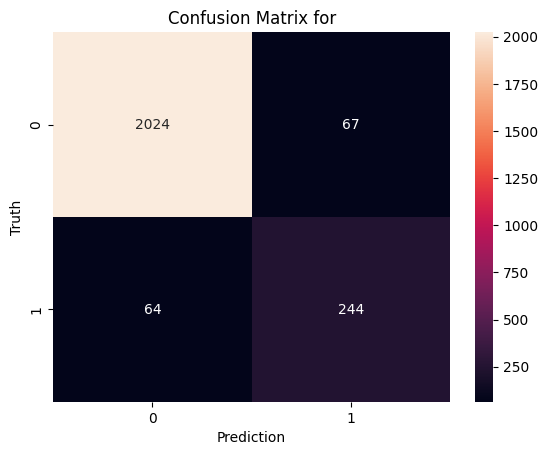

In [21]:
conf_dec_tree = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_dec_tree, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix for')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

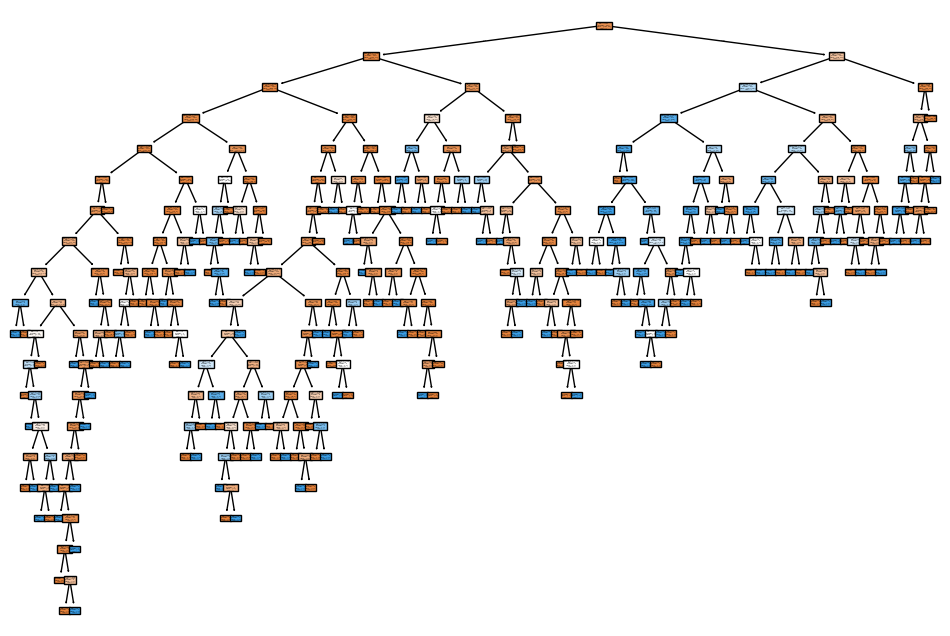

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=df.columns[:-1], class_names=["0", "1"])
plt.show()